# Chapter 3. 신경망

## 3.1 퍼셉트론에서 신경망으로
신경망은 퍼셉트론과 공통점이 많으며, 다른 점을 중심으로 구조를 알아본다.


### 3.1.1 신경망의 예
- 입력층, 은닉층, 출력층으로 구성됨 (은닉층의 뉴런은 입력층이나 출력층과 달리 사람 눈에 보이지 않음)

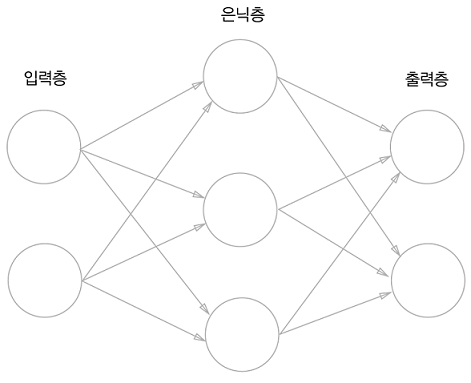

퍼셉트론과 크게 달라보이진 않는데, 신경망에서는 신호를 어떻게 전달할까?

### 3.1.2 퍼셉트론 복습
신경망의 신호 전달 방법을 보기 전에 퍼셉트론을 복습해 본다.

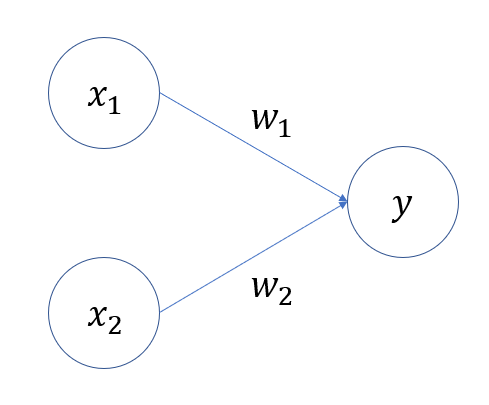

위는 $x_1$과 $x_2$라는 두 신호를 입력받아 $y$를 출력하는 퍼셉트론이다. 이를 수식으로 나타내면 다음과 같다.

$$
y =
\begin{cases}
0 \left( b + w_1 x_1 + w_2 x_2 \leq 0 \right) \\
1 \left( b + w_1 x_1 + w_2 x_2 > 0 \right)
\end{cases}
$$

하지만 위 퍼셉트론의 네트워크에는 편향 $b$가 보이지 않는데, 이를 명시해 보면 다음과 같다.

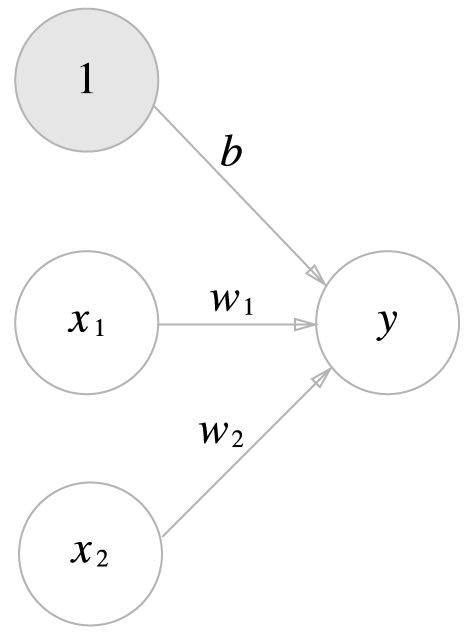

위 그림에서는 가중치가 $b$이고 입력이 1인 뉴런이 추가되었다. 참고로, 편향의 입력 신호는 항상 1이다.

이 퍼셉트론의 동작은 $x_1$,$x_2$, 1이라는 3개의 신호가 뉴런에 입력되어, 각 신호에 가중치를 곱한 후, 다음 뉴런에 전달된다. 다음 뉴런에서는 이 신호들의 값을 더하여, 그 합이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력한다. 이를 함수 $h(x)$로 나타내면 다음과 같다.

$$
y = h(b + w_1 x_1 + w_2 x_2)
$$


$$
h(x) =
\begin{cases}
0, & \text{if } x \leq 0 \\
1, & \text{if } x > 0
\end{cases}
$$


위는 입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변환된 값이 $y$의 출력이 됨을 보여준다. 그리고 $h(x)$ 함수는 입력이 0을 넘으면 1을 돌려주고 그렇지 않으면 0을 돌려준다.

따라서 위의 퍼셉트론 수식과 이 퍼셉트론 수식들이 하는 일은 같다.

### 3.1.3 활성화 함수의 등장
위 $h(x)$ 함수와 같이, 입력 신호의 총합을 출력 신호로 변환하는 함수를 **활성화 함수(activation function)**라 한다.

1. 가중치가 곱해진 입력 신호의 총합을 계산 (가중치가 달린 입력 신호와 편향의 총합)

$$
a = b + w_1 x_1 + w_2 x_2
$$


2. 계산한 합을 활성화 함수에 입력해 결과(y)를 냄

$$
y = h(a)
$$


지금까지와 같이 뉴런을 큰 원(⚪) 으로 그려보면 다음과 같다.

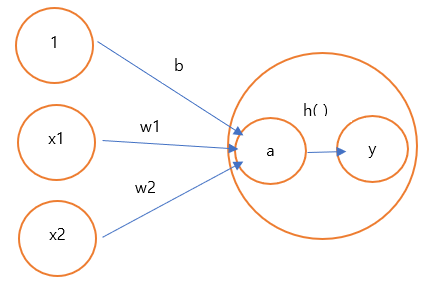

기존 y 뉴런의 원을 키우고, 내부에 활성화 함수의 처리 과정. 즉, 가중치 신호를 조합한 결과가 $a$ 노드가 되고, 활성화 함수인 $h()$을 통과하여 $y$라는 노드로 변환되는 과정이다.

(뉴런과 노드는 같은 의미로 사용됨)

이 책에서는 퍼셉트론이라는 말이 가리키는 알고리즘을 엄밀히 통일하지 않았음
- 단순 퍼셉트론: 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리킴
- 다층 퍼셉트론: 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)를 가리킴


## 3.2 활성화 함수


위의 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 계단 함수(step function)이라 한다.

즉, 활성화 함수의 종류로 계단 함수를 사용한 것인데, 이를 다른 함수로도 변경할 수 있다.

### 3.2.1 시그모이드 함수

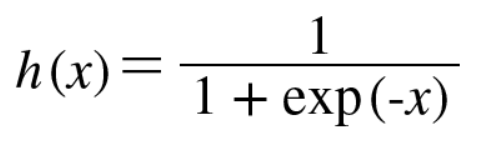

- $exp(-x)$ 는 $e^{-x}$를 뜻하며, $e$ 는 자연상수로 2.7182...의 값을 갖는 실수
- 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달함. 즉, 퍼셉트론과 신경망의 주된 차이는 활성화 함수

### 3.2.2 계단 함수 구현하기
계단 함수는 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력하는 함수

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

- 인수 x는 실수(부동소수점)만 받아들임.
- 즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 순 없음. 또는 step_function(np.array([1.0, 2.0])) 도 안 됨.
- 앞으로는 넘파이 배열도 지원하도록 수정하고 싶다면 다음과 같이 구현하면 됨.

In [ ]:
def step_function(x):
  y = x > 0
  return y.astype(np.int)

다음은 x라는 넘파이 배열을 준비하고 그 넘파이 배열에 부등호 연산을 수행한다.

이를 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다.

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

하지만 우리가 원하는 계단 함수는 0이나 1의 'int형'을 출력하는 함수이므로 배열 y의 원소를 bool에서 int형으로 바꿔주자.

In [ ]:
y = y.astype(np.int32)
y

array([0, 1, 1], dtype=int32)

### 3.2.3 계단 함수의 그래프

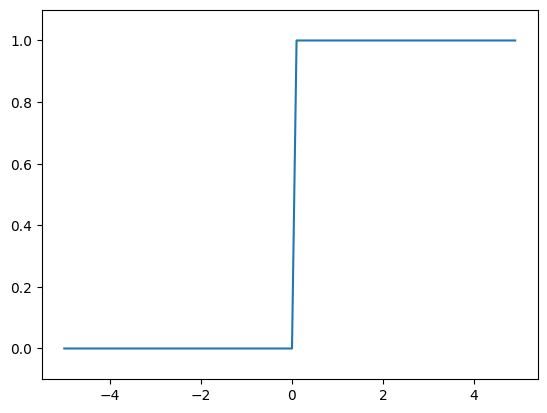

In [ ]:
import numpy as np
import matplotlib.pylab as plt

# 인수로 받은 넘파이 배열의 원소 각각을 인수로 계단 함수를 실행하여, 그 결과를 다시 배열로 만들어줌
def step_function(x):
  return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1) # -5.0 ~ 4.9까지 0.1 간격의 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

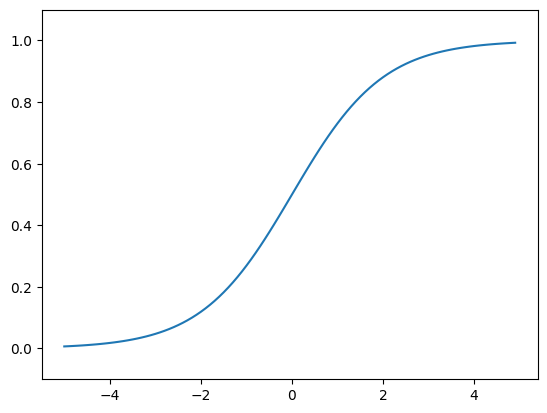

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.5 시그모이드 함수와 계단 함수 비교
- 시그모이드 함수: 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화. 실수를 반환함.
- 계단 함수: 0을 경계로 출력이 바뀜 (0/1 반환)

하지만 공통된 특성으로 같은 모양을 하고 있는데, 이는 둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조임을 나타낸다. 즉, 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.

또한, 입력이 아무리 작거나 커도 출력은 0에서 1 사이다.

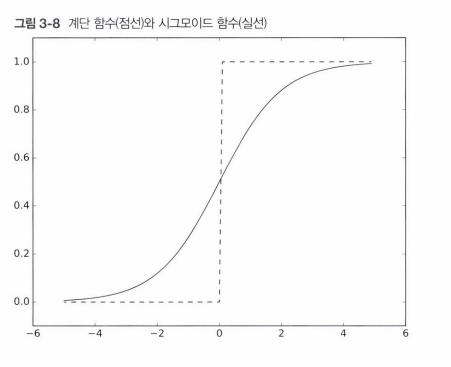

### 3.2.6 비선형 함수
- 계단 함수와 시그모이드 함수는 모두 비선형 함수
- 신경망에서는 활성화 함수로 비선형 함수를 사용해야 하는데, 그 이유는 무엇일까?
  - 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 즉, 아무리 여러 층을 쌓아도 은닉층이 없는 네트워크로 표현 가능하다.
  - ex. $h(x)$ = $c(x)$를 활성화 함수로 사용한 3층 네트워크일 때, $y(x)=h(h(h(x)))$는 즉, $y(x)=c*c*c*x$이므로 $y(x)=ax$와 같은 식이게 된다.$(a=c^3)$

### 3.2.7 ReLU 함수
- 최근 사용하는 활성화 함수 ReLU (Rectified Linear Unit)
- 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수

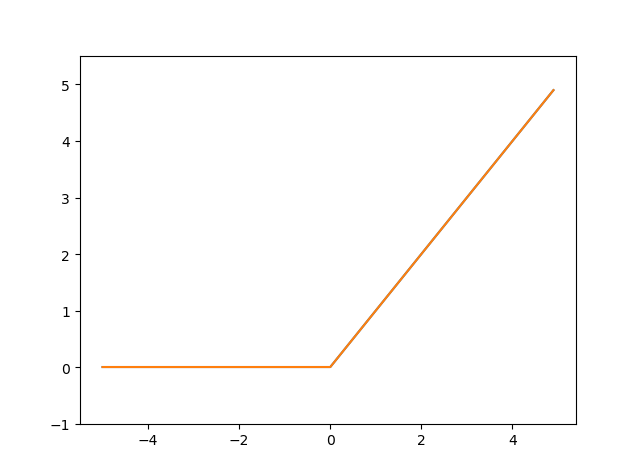

수식으로 나타내면 다음과 같다.

$$
h(x) =
\begin{cases}
x \left( x > 0 \right ) \\
0 \left( x \leq 0 \right)
\end{cases}
$$

In [ ]:
def relu(x):
  return np.maximum(0, x) # maximum은 두 입력 중 큰 값을 선택해 반환하는 함수

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열
- 다차원 배열은 '숫자의 집합'
- ex. 숫자가 한 줄로 늘어선 것, 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것, N차원으로 나열하는 것

In [2]:
# 1차원 배열

import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
np.ndim(A) # 배열의 차원 수: 1차원 배열

[1 2 3 4]


1

In [3]:
A.shape # 배열의 형상: 원소 4개로 구성되어 있음을 알 수 있음. 튜플로 반환.

(4,)

In [4]:
A.shape[0]

4

In [6]:
# 2차원 배열

B = np.array([[1,2], [3,4],[5,6]])
print(B)
np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [7]:
B.shape # 3x2 배열: 처음 차원(0)에는 원소가 3개, 다음 차원(1)에는 원소가 2개

(3, 2)

2차원 배열은 행렬(matrix)라 부름
- 행(row): 배열의 가로 방향
- 열(column): 배열의 세로 방향

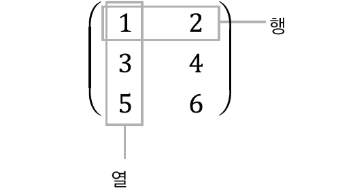

### 3.3.2 행렬의 곱
행렬의 곱은 왼쪽 행렬의 행(가로)와 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산한다. 그리고 그 계산 결과가 새로운 다차원 배열의 원소가 된다.

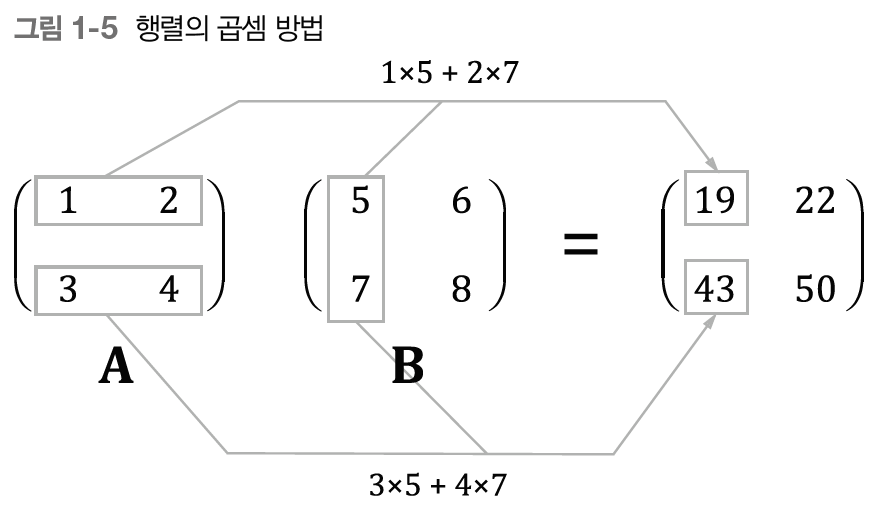

In [9]:
A = np.array([[1,2], [3,4]])
A.shape # (2,2)

B = np.array([[5,6], [7,8]])
B.shape # (2,2)

np.dot(A, B) # 행렬의 곱

array([[19, 22],
       [43, 50]])

np.dot()은 입력이 1차원 배열이면 벡터를, 2차원 배열이면 행렬 곱을 계산한다.

주의할 점은 np.dot(A,B)와 np.dot(B,A)는 다른 값이 될 수 있다. (피연산자의 순서가 다르면 결과도 다름)

In [10]:
A = np.array([[1,2,3], [4,5,6]])
A.shape # (2,3)

B = np.array([[1,2], [3,4], [5,6]])
B.shape # (3,2)

np.dot(A, B)

array([[22, 28],
       [49, 64]])

이와 같이 행렬의 곱을 수행하기 위해서는 '행렬의 형상(shape)'에 주의해야 한다.

구체적으로, 행렬 A의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 한다.

In [11]:
# 다른 shape끼리의 행렬 곱 예시: 오류 발생

C = np.array([[1,2], [3,4]])
C.shape # (2,2)
A.shape # (2,3)

np.dot(A,C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

즉, 다차원 배열을 곱하려면 두 행렬의 대응하는 차원의 원소 수를 일치시켜야 한다.

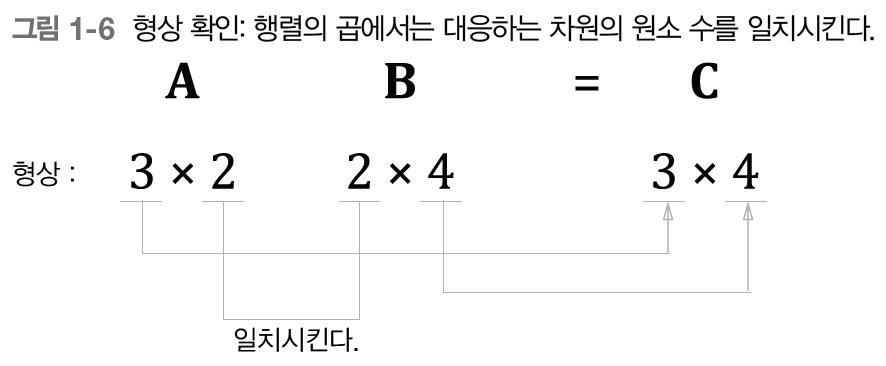

마찬가지로, A가 2차원 배열이고 B가 1차원 배열일 때도 '대응하는 차원의 원소 수를 일치시켜라'는 원칙이 똑같이 적용된다.

In [12]:
A = np.array([[1,2], [3,4], [5,6]])
A.shape # (3,2)

B = np.array([7,8])
B.shape # (2, )

np.dot(A, B)

array([23, 53, 83])

### 3.3.3 신경망에서의 행렬 곱

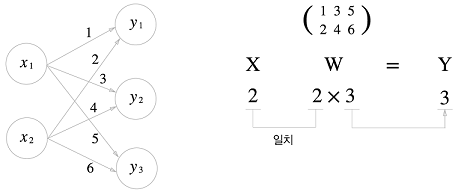

In [13]:
X = np.array([1, 2])
X.shape # (2, )

W = np.array([[1,3,5], [2,4,6]])
print(W)
W.shape #(2, 3)

Y = np.dot(X,W)
print(Y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


이런 식으로 다차원 배열의 스칼라곱을 구해주는 np.dot 함수를 사용하면 단번에 결과 Y를 계산할 수 있다. (사용하지 않으면 Y의 원소를 하나씩 따져보거나 for문을 사용해야 함)

## 3.4 3층 신경망 구현하기
- 순방향 처리 구현

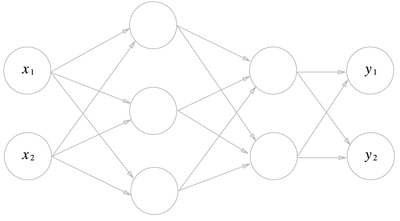

### 3.4.1 표기법 설명

다음은 입력층의 뉴런 $x_2$에서 다음 층의 뉴런 $a_1^{(1)}$으로 향하는 선 위에 가중치를 표시하고 있다.

- 가중치와 은닉층 뉴런의 오른쪽 위의 $^{(1)}$은 1층의 가중치, 1층의 뉴런임을 뜻하는 번호
- 가중치의 오른쪽 아래의 두 숫자는 차례로 다음 층 뉴런과 앞 층 뉴런의 인덱스 번호
- ex. $w_{12}^{(1)}$ 는 앞 층의 2번째 뉴런($x_2$)에서 다음 층의 1번째 뉴런 ($a_1^{(1)}$)으로 향할 때의 가중치라는 뜻

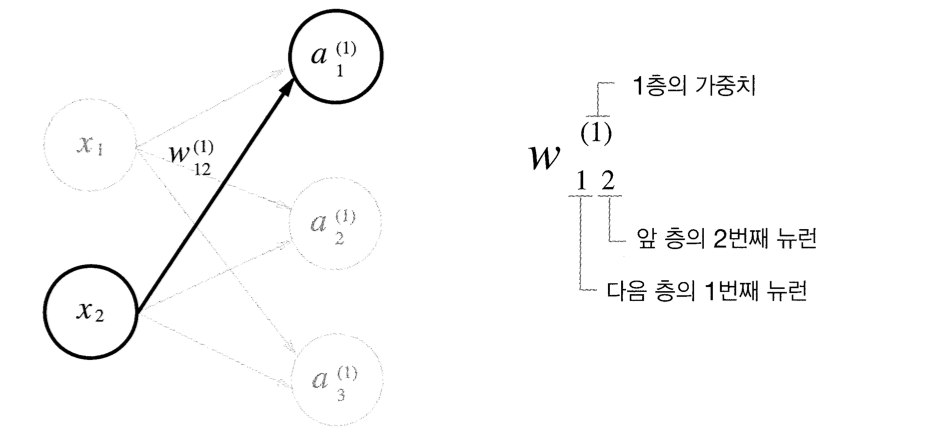

### 3.4.2 각 층의 신호 전달 구현하기
입력층에서 '1층의 첫 번째 뉴런'으로 가는 신호를 살펴본다.

달라진 점은 편향을 뜻하는 뉴런인 1이 추가된 점이다. 편향은 오른쪽 아래 인덱스가 하나밖에 없는데, 이는 앞 층의 편향 뉴런이 하나뿐이기 때문.

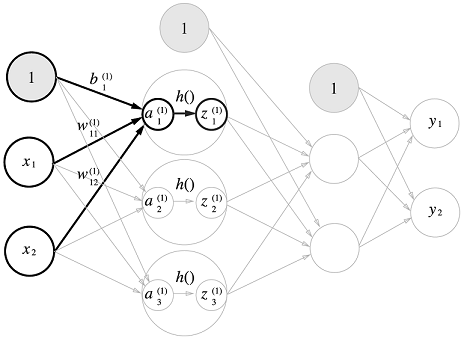

$a_1^{(1)}$을 수식으로 나타내면 다음과 같다.

$ a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)} $

여기서 행렬의 곱을 이용하면 1층의 '가중치 부분'을 다음 식처럼 간소화할 수 있다.


$ A^{(1)} = XW^{(1)} + B^{(1)} $

이때,

$A^{(1)}$ = \begin{pmatrix}
a_1^{(1)} & a_2^{(1)} & a_3^{(1)}
\end{pmatrix}

$X$ = \begin{pmatrix}
x_1 & x_2
\end{pmatrix}

$B^{(1)}$ = \begin{pmatrix}
b_1^{(1)} & b_2^{(1)} & b_3^{(1)}
\end{pmatrix}

$W^{(1)}$ = \begin{pmatrix}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}

In [3]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) # (2, 3) 즉 2x3 행렬
print(X.shape) # (2, ) 즉 원소가 2개인 1차원 배열
print(B1.shape) # (3, )

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


위의 그림을 보면 은닉층에서의 가중치 합(가중 신호와 편향의 총합)을 $a$로 표기하고 활서오하 함수 $h(x)$ 로 변환된 신호를 $z$로 표기한다.

In [6]:
# Sigmoid 함수를 활성화 함수로 사용

from scipy.special import expit as sigmoid

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


이어서 1층에서 2층으로 가는 과정과 그 구현을 살펴보자.

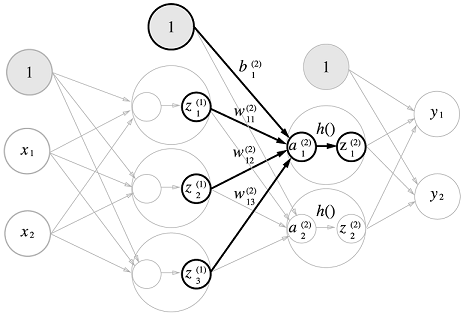

이는 1층의 출력 Z1이 2층의 입력이 된다는 점을 제외하곤 전의 구현과 똑같다.

In [11]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


마지막으로 2층에서 출력층으로의 신호 전달이다.

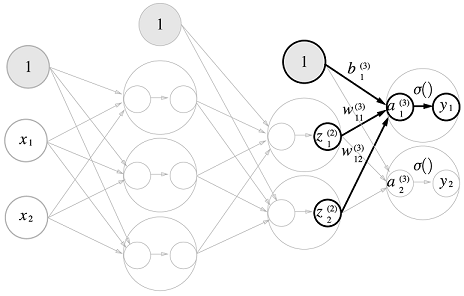

이 구현도 전의 구현과 거의 같지만, 활성화 함수만 다르다.

항등 함수(입력을 그대로 출력하는 함수임. 흐름 통일을 위해 정의한 것이라 굳이 정의할 필요는 없음)를 정의하고, 이를 출력층의 활성화 함수로 이용했다.

또한, 출력층의 활성화 함수를 $σ()$로 표시하여 은닉층의 활성화 함수 $h(x)$와는 다름을 명시하였다.

In [12]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 결정한다.
- 회귀: 항등 함수
- 2클래스 분류: 시그모이드 함수
- 다중 클래스 분류: 소프트맥스 함수

### 3.4.3 구현 정리

In [13]:
# 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
def init_network():
  network = {} # 각 층에 필요한 매개변수(가중치와 편향) 저장
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

# 입력 신호를 출력으로 변환하는 처리 과정 구현
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있다.
- 분류: 데이터가 어느 클래스에 속하는지 문제 ex. 인물의 성별 분류
- 회귀: 입력 데이터에서 (연속적인) 수치를 예측하는 문제 ex. 사진 속 인물의 몸무게 예측

이중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다. 일반적으로는 회귀에는 항등 함수를, 분류에서는 소프트맥스 함수를 사용한다.

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

항등 함수(identity function)은 입력을 그대로 출력한다. (입력 신호 -> 출력 신호)

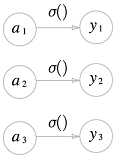

반면, 분류에서 사용하는 소프트맥스 함수(softmax function)의 식은 다음과 같다.

- $exp(x)$는 $e^{x}$를 뜻하는 지수 함수(exponential function)이다. ($e$는 자연상수)
- $n$은 출력층의 뉴런 수
- $y_k$는 그중 $k$번째 출력

소프트맥스 함수의 분자는 입력 신호 $a_k$의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합으로 구성됨

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)}
$$


이 소프트맥스 함수를 그림으로 나타내면 다음과 같은데, 소프트맥스의 출력은 모든 입력 신호로부터 화살표(영향)를 받기 때문이다.

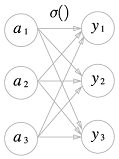

In [15]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [16]:
# 위 논리 흐름을 함수로 정의

def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

앞 절에서 구현한 softmax() 함수의 코드는 식을 제대로 표현하고 있지만, 컴퓨터로 계산할 때는 오버플로 문제가 발생하는 결함이 있다.

소프트맥스 함수는 지수 함수를 사용하는데, 이 지수 함수가 쉽게 아주 큰 값을 내뱉기 때문. 이런 큰 값끼리 나눗셈을 하면 결과 수치가 '불안정'해진다.



> 오버플로란?

컴퓨터는 수(number)를 4바이트나 8바이트와 같이 크기가 유한한 데이터로 다룬다. 다시 말해 표현할 수 있는 수의 범위가 한정되어 너무 큰 값은 표현할 수 없다는 문제가 발생하는데, 이를 오버플로라 하며, 컴퓨터로 수치를 계산할 때 주의할 점이다.

오버플로를 해결하도록 소프트맥스 함수 구현을 개선한 수식은 다음과 같다.

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n} \exp(a_i)} = \frac{C \exp(a_k)}{C \sum_{i=1}^{n} \exp(a_i)}
$$

$$
= \frac{\exp(a_k + \log C)}{\sum_{i=1}^{n} \exp(a_i + \log C)}
= \frac{\exp(a_k + C')}{\sum_{i=1}^{n} \exp(a_i + C')}
$$


위 식이 말하는 것은 소프트맥스의 지수 함수를 계산할 때 어떤 정수를 더해도 (혹은 빼도) 결과는 바뀌지 않는다는 것이다. (C라는 같은 임의의 정수를 곱했으니 결국 똑같은 계산)

$C'$에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적이다.

In [18]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산: 제대로 계산되지 않는다

<ipython-input-18-83f697b1e296>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산: 제대로 계산되지 않는다
<ipython-input-18-83f697b1e296>:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산: 제대로 계산되지 않는다


array([nan, nan, nan])

위와 같이 아무런 조치 없이 그냥 계산하면 nan이 출력되는데, 입력 신호 중 최댓값(이 예에서는 c)을 빼주면 올바르게 계산할 수 있다.

In [19]:
c = np.max(a) # C = 1010 (최댓값)
a - c

array([  0, -10, -20])

In [20]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

이를 바탕으로 소프트맥스 함수를 다시 구현하면 다음과 같다.

In [21]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # 오버플로 대책
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.3 소프트맥스 함수의 특징

In [22]:
# softmax() 함수를 사용한 신경망의 출력

a = np.array([0.3, 2.9, 4.0])
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

보는 바와 같이 소프트맥스 함수의 출력은 0에서 1.0 사이의 실수이며, 이 함수의 출력의 총합은 1이다.

이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

- 앞의 예에서 y[0]의 확률은 0.018 (1.8%), y[1]의 확률은 0.245 (24.5%), y[2]의 확률은 0.737 (73.7%)로 해석할 수 있다.
- 이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니, 답은 2번째 클래스다"라 할 수 있다. 혹은 "74% 확률로 2번째 클래스, 25%의 확률로 1번째 클래스, 1% 확률로 0번째 클래스다"와 같은 확률적인 결론도 낼 수 있다.

여기서 주의점으로, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 이는 지수 함수 $y=exp(x)$가 단조 증가 함수이기 때문이다.


> 단조 증가 함수란?

정의역 원소 $a, b$가 $a<=b$일 때, $f(a)<=f(b)$가 성립하는 함수다.


신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다. 소프트맥스 함수는 출력값을 확률 분포로 변환해 각 클래스가 선택될 확률을 보여주는 역할을 하지만, 출력값 중 가장 큰 값의 위치는 변하지 않는다. 즉, 소프트맥스 함수를 적용하지 않아도 가장 큰 출력값을 가진 뉴런이 선택되는 결과는 그대로 유지된다.

따라서 분류 작업에서는 출력층의 소프트맥스 함수를 생략해도 실제 예측 결과에는 영향을 미치지 않는다. 실제로 확률적 해석이 필요하지 않은 경우, 소프트맥스 함수는 추가적인 연산 비용을 발생시키기 때문에 지수 함수 계산에 드는 자원 낭비를 줄이기 위해 출력층의 소프트맥스 함수를 생략하는 것이 일반적이다.

### 3.5.4 출력층의 뉴런 수 정하기

출력층의 뉴런 수는 풀려는 문제에 맞게 적절히 정해야 한다.
- 분류 문제: 분류하고 싶은 클래스 수로 설정

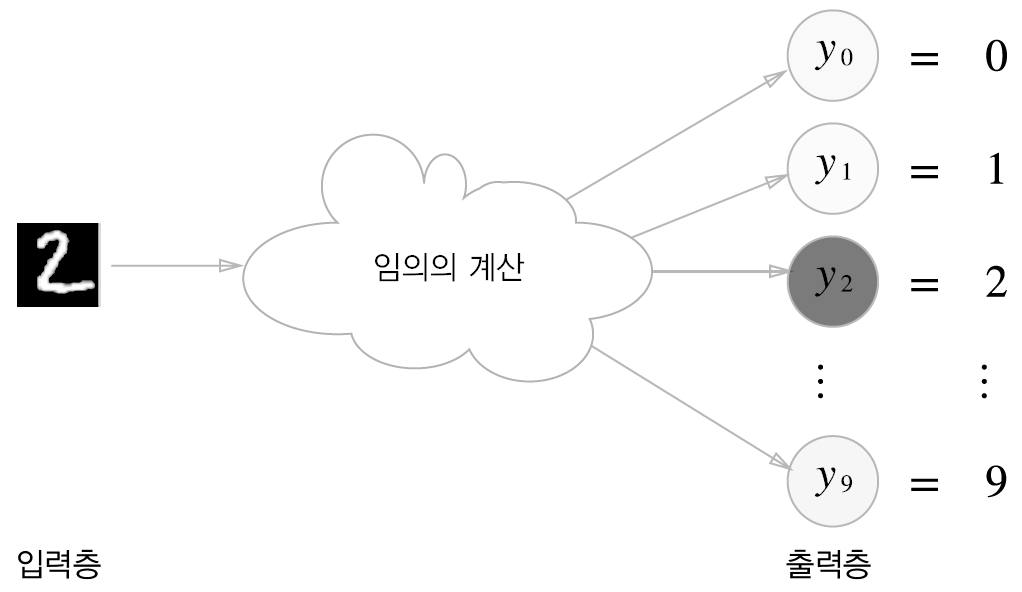

## 3.6 손글씨 숫자 인식
손글씨 숫자 분류 실습을 통해 신경망의 구조를 이해해 보도록 한다. 이번에는 이미 학습된 매개변수를 사용하여 학습 과정을 생략하고, 추론 과정만 구현하자. 이 추론 과정을 신경망의 순전파(forward propagation)라고도 한다.

신경망의 과정
1. 훈련 데이터(학습 데이터)를 사용해 가중치 매개변수 학습
2. 추론 단계에서 앞서 학습한 매개변수를 사용하여 입력 데이터 분류

### 3.6.1 MNIST 데이터셋

MNIST 데이터셋은 솔글씨 숫자 이미지 집합이다.
- 0부터 9까지의 숫자 이미지
- 훈련 이미지가 60000장, 시험 이미지가 10000장
- 28x28 크기의 회색조 이미지(1채널)이며, 각 픽셀은 0에서 255까지 값을 취함
- 숫자가 레이블로 붙어 있음

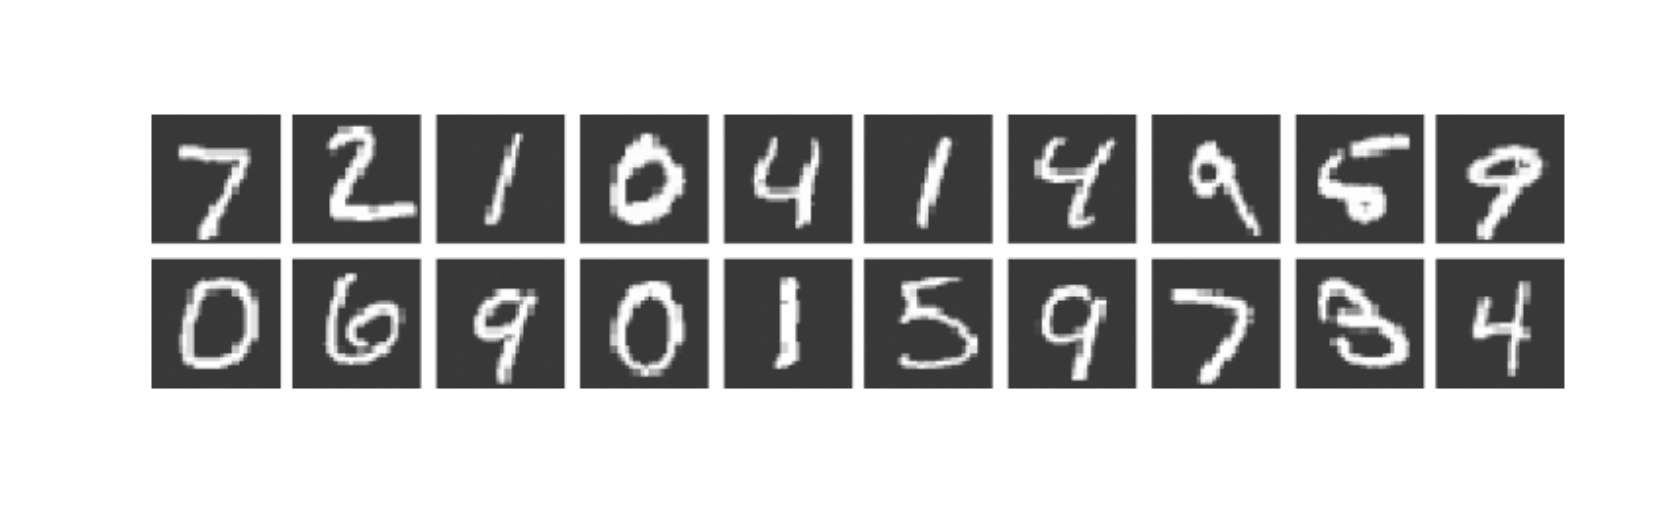

#### mnist.py

In [24]:
!pip install mnist

In [ ]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

`load_mnist`는 MNIST 데이터를 '(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)' 형식으로 반환한다. 인수로는 normalize, flatten, one_hot_label 세 가지를 설정할 수 있다. 세 인수 모두 bool 값이다.
- normalize: 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화할지 정함. False로 설정 시 입력 이미지의 픽셀은 원래 값 그대로 0 ~ 255 사이의 값을 유지
- flatten: 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지를 정함. False로 설정 시 입력 이미지를 1x28x28의 3차원 배열로, True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장함
- one_hot_label: 레이블을 원-핫 인코딩(one-hot encoding) 형태로 저장할지를 정함. 이는 정답을 뜻하는 원소만 1이고(hot하고) 나머지는 모두 0인 배열이다. False로 설정 시 '7', '2'와 같은 숫자 형태의 레이블을 저장하고, True일 때는 레이블을 원-핫 인코딩하여 저장한다.

> pickle 기능

파이썬 기능이며 프로그램 실행 중에 특정 객체를 파일로 저장하는 기능이다.

#### mnist_show.py

In [ ]:
# MNIST 이미지를 화면으로 표시

import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape)
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

주의할 사항으로, `flatten=True`로 설정해 읽어들인 이미지는 1차원 넘파이 배열로 저장되어 있다는 것이다. 따라서 이미지를 표시할 때는 원래 형상인 28x28 크기로 다시 변형해야 한다. 이는 reshape() 메서드에 원하는 형상을 인수로 지정하면 넘파이 배열의 형상을 바꿀 수 있다. 또한, 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 `Image.fromarray()`가 수행한다.


### 3.6.2 신경망의 추론 처리

이제 MNIST 데이터셋을 가지고 추론을 수행하는 신경망을 구현할 차례다.
- 신경망은 입력층 뉴런을 784개, 출력층 뉴런을 10개로 구성
  - 입력층 뉴런 784 = 28 x 28 (이미지 크기)
  - 출력층 뉴런 10개는 문제가 0부터 9까지의 숫자를 구분하는 문제이므로
- 은닉층은 총 두 개: 첫 번째 은닉층에서는 50개 뉴런을, 두 번째 은닉층에는 100개의 뉴런을 배치

#### neuralnet_mnist.py

- `init_network()` 에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다. 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.

In [ ]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

이 세 함수를 사용해 신경망에 의한 추론을 수행해보고, accuracy(분류가 얼마나 올바른가)를 평가하자.

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

1. MNIST 데이터셋을 얻고 네트워크를 생성한다.
2. for문을 돌며 x에 저장된 이미지 데이터를 1장씩 꺼내 predict() 함수로 분류한다. 이 predict() 함수는 각 레이블의 확률을 넘파이 배열로 반환한다.
3. np.argmax() 함수로 이 배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구한다. 즉, 예측 결과가 나온다.
4. 마지막으로, 신경망이 예측한 답변과 정답 레이블을 비교하여 맞힌 숫자(accuracy_cnt)를 세고, 이를 전체 이미지 숫자로 나눠 정확도를 구한다.

이 예에서는 load_mnist 함수의 인수인 normalize를 True로 설정했는데, 0 ~ 255 범위인 각 픽셀의 값을 0.0 ~ 1.0 범위로 변환한다. (단순히 픽셀 값을 255로 나눔)

이처럼 데이터를 특정 범위로 변환하는 처리를 **정규화(normalization)**라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 **전처리(pre-processing)**라 한다.

위에서는 각 픽셀의 값을 255로 나누는 단순 정규화를 수행했지만, 현업에서는 데이터 전체의 분포를 고려해 전처리하는 경우가 많다.

ex.
- 데이터 전체 평균과 표준편차를 이용하여 데이터들이 0을 중심으로 분포하도록 이동
- 데이터의 확산 범위를 제한하는 정규화 수행
- 전체 데이터를 균일하게 분포시키는 데이터 백색화(whitening)

### 3.6.3 배치 처리

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape) # (10000, 784)
print(x[0].shape) # (784, )
print(W1.shape) # (784, 50)
print(W2.shape) # (50, 100)
print(W3.shape) # (100, 10)

이를 통해 다차원 배열의 대응하는 차원의 원소 수가 일치함을 확인할 수 있다. (편향은 생략함)

최종 결과로는 원소가 10개인 1차원 배열 y가 출력되는 점도 확인할 수 있다.

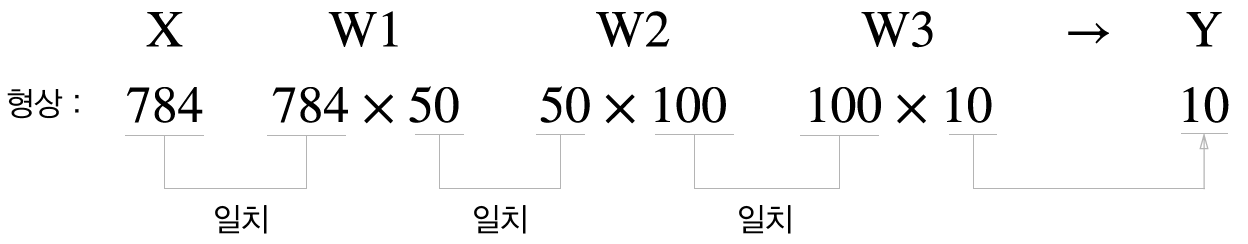

전체적으로 보면 원소 784개로 구성된 1차원 배열(원래는 28x28인 2차원 배열)이 입력되어 마지막에는 원소가 10개인 1차원 배열이 출력되는 흐름이다.

=> 이는 데이터를 1장만 입력했을 때의 처리 흐름이다. 그렇다면 이미지 여러 장을 한꺼번에 입력하는 경우는? 즉, 이미지 100개를 묶어 predict() 함수에 한 번에 넘기기 위해서는 어떻게 할까?

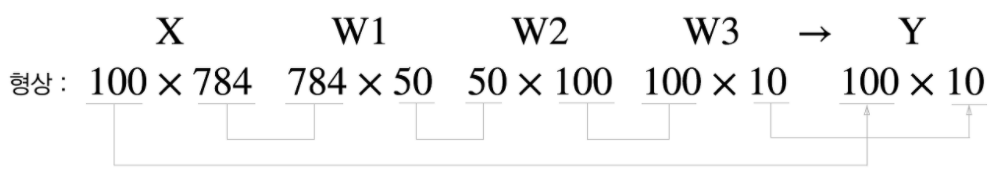

위와 같이 x의 형상을 100x784로 바꾸어 100장 분량의 데이터를 하나의 입력 데이터로 표현하면 된다.
- x[0]과 y[0]에는 0번째 이미지와 그 추론 결과
- x[1]과 y[1]에는 1번째의 이미지와 그 결과가 저장되는 식

이처럼 하나로 묶은 입력 데이터를 **배치(batch)**라 한다.


> 배치 처리의 이점?

- 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도록 최적화되어 있음
- 커다란 신경망에서는 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 배치 처리를 함으로써 버스에 주는 부하를 줄일 수 있음. (정확히는 느린 I/O를 통해 데이터를 읽는 횟수가 줄어, 빠른 CPU나 GPU로 순수 계산을 수행하는 비율이 높아짐)

즉, 배치 처리를 수행함으로써 큰 배열로 이루어진 계산을 하게 되는데, 컴퓨터에서는 큰 배열을 한꺼번에 계산하는 것이 분할된 작은 배열을 여러 번 계산하는 것보다 빠르다.

In [ ]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

# x[0:100], x[100:200], ... 와 같이 앞에서부터 100장씩 묶어 꺼낸다.
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

In [ ]:
list(range(0, 10)) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
list(range(0, 10, 3)) # [0, 3, 6, 9]

이 range() 함수가 반환하는 리스트를 바탕으로 x[i:i+batch_size]와 같이 입력 데이터의 i번째부터 i+batch_size번째까지의 데이터를 묶는다.

그리고 argmax()는 최댓값의 인덱스를 가져온다. 다만 여기서 주의할 점은 axis=1이라는 인수를 추가한 점인데, 이는 100x10의 배열 중 1번째 차원을 구성하는 각 원소에서(1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 한 것이다.

In [27]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6]])
y = np.argmax(x, axis=1)
print(y)

[1 2]


마지막으로 배치 단위로 분류한 결과를 실제 답과 비교한다. 이를 위해 == 연산자를 사용해 넘파이 배열끼리 비교하여 True/False로 구성된 bool 배열을 만들고, 이 결과 배열에서 True가 몇 개인지 센다.

In [29]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
print(np.sum(y == t))

[ True  True False  True]
3


## 3.7 정리

- 신경망에서는 활성화 함수로 시그모이드 함수나 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
- 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.